In [359]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [360]:
df = pd.read_csv("purchase.csv")

In [361]:
df.head(4)

,Install Time,Event Time,Event Name,Media Source
0,2019-11-30 22:08:07,2019-11-30 23:17:10,af_purchase,Facebook Ads
1,2019-11-30 15:22:04,2019-11-30 22:52:38,af_purchase,Facebook Ads
2,2019-11-30 22:10:07,2019-11-30 22:43:50,af_purchase,Facebook Ads
3,2019-11-30 15:24:47,2019-11-30 22:43:37,af_purchase,Facebook Ads


In [362]:
df.shape

(4415, 4)

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Install Time  4415 non-null   object
 1   Event Time    4415 non-null   object
 2   Event Name    4415 non-null   object
 3   Media Source  4415 non-null   object
dtypes: object(4)
memory usage: 138.1+ KB


In [364]:
# Convert 'Install Date' and 'Install Time' columns to datetime format
df['Event Time'] = pd.to_datetime(df['Event Time'])
df['Install Time'] = pd.to_datetime(df['Install Time'])

In [365]:
df['Install_week'] = df['Install Time'].dt.isocalendar().week
df['Install_month'] = df['Install Time'].dt.month
df['Install Date'] = df['Install Time'].dt.date

In [366]:
df.head(3)

,Install Time,Event Time,Event Name,Media Source,Install_week,Install_month,Install Date
0,2019-11-30 22:08:07,2019-11-30 23:17:10,af_purchase,Facebook Ads,48,11,2019-11-30
1,2019-11-30 15:22:04,2019-11-30 22:52:38,af_purchase,Facebook Ads,48,11,2019-11-30
2,2019-11-30 22:10:07,2019-11-30 22:43:50,af_purchase,Facebook Ads,48,11,2019-11-30


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Install Time   4415 non-null   datetime64[ns]
 1   Event Time     4415 non-null   datetime64[ns]
 2   Event Name     4415 non-null   object        
 3   Media Source   4415 non-null   object        
 4   Install_week   4415 non-null   UInt32        
 5   Install_month  4415 non-null   int64         
 6   Install Date   4415 non-null   object        
dtypes: UInt32(1), datetime64[ns](2), int64(1), object(3)
memory usage: 228.6+ KB


In [368]:
df.describe()

,Install_week,Install_month
count,4415.0,4415.000000
mean,48.007928,11.514609
std,4.413923,0.499843
min,1.0,11.000000
25%,45.0,11.000000
50%,48.0,12.000000
75%,51.0,12.000000
max,52.0,12.000000


In [369]:
# filter nov month data
nov_data = df[df['Install_month'] == 11]
nov_value_counts = nov_data['Install_week'].value_counts()
nov_value_counts

45    781
46    490
47    322
44    311
48    239
Name: Install_week, dtype: Int64

In [370]:
# filter dec month data
dec_data = df[df['Install_month'] == 12]
dec_value_counts = dec_data['Install_week'].value_counts()
dec_value_counts

51    1071
52     466
49     351
50     312
48      48
1       24
Name: Install_week, dtype: Int64

In [371]:
nov_data.head(3)

,Install Time,Event Time,Event Name,Media Source,Install_week,Install_month,Install Date
0,2019-11-30 22:08:07,2019-11-30 23:17:10,af_purchase,Facebook Ads,48,11,2019-11-30
1,2019-11-30 15:22:04,2019-11-30 22:52:38,af_purchase,Facebook Ads,48,11,2019-11-30
2,2019-11-30 22:10:07,2019-11-30 22:43:50,af_purchase,Facebook Ads,48,11,2019-11-30


In [372]:
# Define a function to map Install_week to Purchase_week
def map_install_week(install_week):
    if install_week == 44:
        return 'purchase_week1'
    elif install_week == 45:
        return 'purchase_week2'
    elif install_week == 46:
        return 'purchase_week3'
    elif install_week == 47:
        return 'purchase_week4'
    elif install_week == 48:
        return 'purchase_week5'
    else:
        return None

In [373]:
# Apply the function to create the 'Purchase Week' column
nov_data['Purchase Week'] = nov_data['Install_week'].apply(map_install_week)

In [374]:
nov_data.head(3)

,Install Time,Event Time,Event Name,Media Source,Install_week,Install_month,Install Date,Purchase Week
0,2019-11-30 22:08:07,2019-11-30 23:17:10,af_purchase,Facebook Ads,48,11,2019-11-30,purchase_week5
1,2019-11-30 15:22:04,2019-11-30 22:52:38,af_purchase,Facebook Ads,48,11,2019-11-30,purchase_week5
2,2019-11-30 22:10:07,2019-11-30 22:43:50,af_purchase,Facebook Ads,48,11,2019-11-30,purchase_week5


In [375]:
# Define a function to map Install_week to Purchase_week
def map_install_week(install_week):
    if install_week == 48:
        return 'purchase_week1'
    elif install_week == 49:
        return 'purchase_week2'
    elif install_week == 50:
        return 'purchase_week3'
    elif install_week == 51:
        return 'purchase_week4'
    elif install_week == 52:
        return 'purchase_week5'
    else:
        return 'purchase_week6'

In [376]:
# Apply the function to create the 'Purchase Week' column
dec_data['Purchase Week'] = dec_data['Install_week'].apply(map_install_week)

In [377]:
dec_data.head(4)

,Install Time,Event Time,Event Name,Media Source,Install_week,Install_month,Install Date,Purchase Week
1507,2019-12-22 14:11:40,2019-12-31 23:49:13,af_purchase,Facebook Ads,51,12,2019-12-22,purchase_week4
1508,2019-12-22 07:05:20,2019-12-31 23:37:25,af_purchase,Facebook Ads,51,12,2019-12-22,purchase_week4
1509,2019-12-22 14:11:40,2019-12-31 23:37:10,af_purchase,Facebook Ads,51,12,2019-12-22,purchase_week4
1510,2019-12-23 16:50:31,2019-12-31 23:03:14,af_purchase,Facebook Ads,52,12,2019-12-23,purchase_week5


In [378]:
# Create a new column for no_of_install (count of installs for each date)
nov_data['no_of_install'] = nov_data.groupby('Install Date')['Install Date'].transform('count')

In [332]:
nov_data.head(3)

,Install Time,Event Time,Event Name,Media Source,Install_week,Install_month,Install Date,Purchase Week,no_of_install
0,2019-11-30 22:08:07,2019-11-30 23:17:10,af_purchase,Facebook Ads,48,11,2019-11-30,purchase_week5,45
1,2019-11-30 15:22:04,2019-11-30 22:52:38,af_purchase,Facebook Ads,48,11,2019-11-30,purchase_week5,45
2,2019-11-30 22:10:07,2019-11-30 22:43:50,af_purchase,Facebook Ads,48,11,2019-11-30,purchase_week5,45


In [383]:
nov_data['No_of_installs'] = nov_data['no_of_install']

In [384]:
# Pivot the table to get the desired output
# pivot_table_nov =pd.pivot_table(nov_data, values='no_of_install', index='Install Date', columns='Purchase Week', aggfunc='count', fill_value=0)
pivot_table_nov =pd.pivot_table(nov_data, values='no_of_install', index=['Install Date','No_of_installs'], columns='Purchase Week', aggfunc='count')

In [385]:
pivot_table_nov.head(5)

,Purchase Week,purchase_week1,purchase_week2,purchase_week3,purchase_week4,purchase_week5
Install Date,No_of_installs,,,,,
2019-11-01,96,96.0,NaN,NaN,NaN,NaN
2019-11-02,106,106.0,NaN,NaN,NaN,NaN
2019-11-03,109,109.0,NaN,NaN,NaN,NaN
2019-11-04,57,NaN,57.0,NaN,NaN,NaN
2019-11-05,80,NaN,80.0,NaN,NaN,NaN


In [386]:
pivot_table_nov.describe()

Purchase Week,purchase_week1,purchase_week2,purchase_week3,purchase_week4,purchase_week5
count,3.000000,7.000000,7.000000,7.0,6.000000
mean,103.666667,111.571429,70.000000,46.0,39.833333
std,6.806859,42.684334,32.020827,5.0,6.853223
min,96.000000,57.000000,26.000000,36.0,32.000000
25%,101.000000,86.500000,43.000000,44.5,34.000000
50%,106.000000,93.000000,82.000000,48.0,40.500000
75%,107.500000,140.500000,94.500000,49.5,44.000000
max,109.000000,177.000000,107.000000,50.0,49.000000


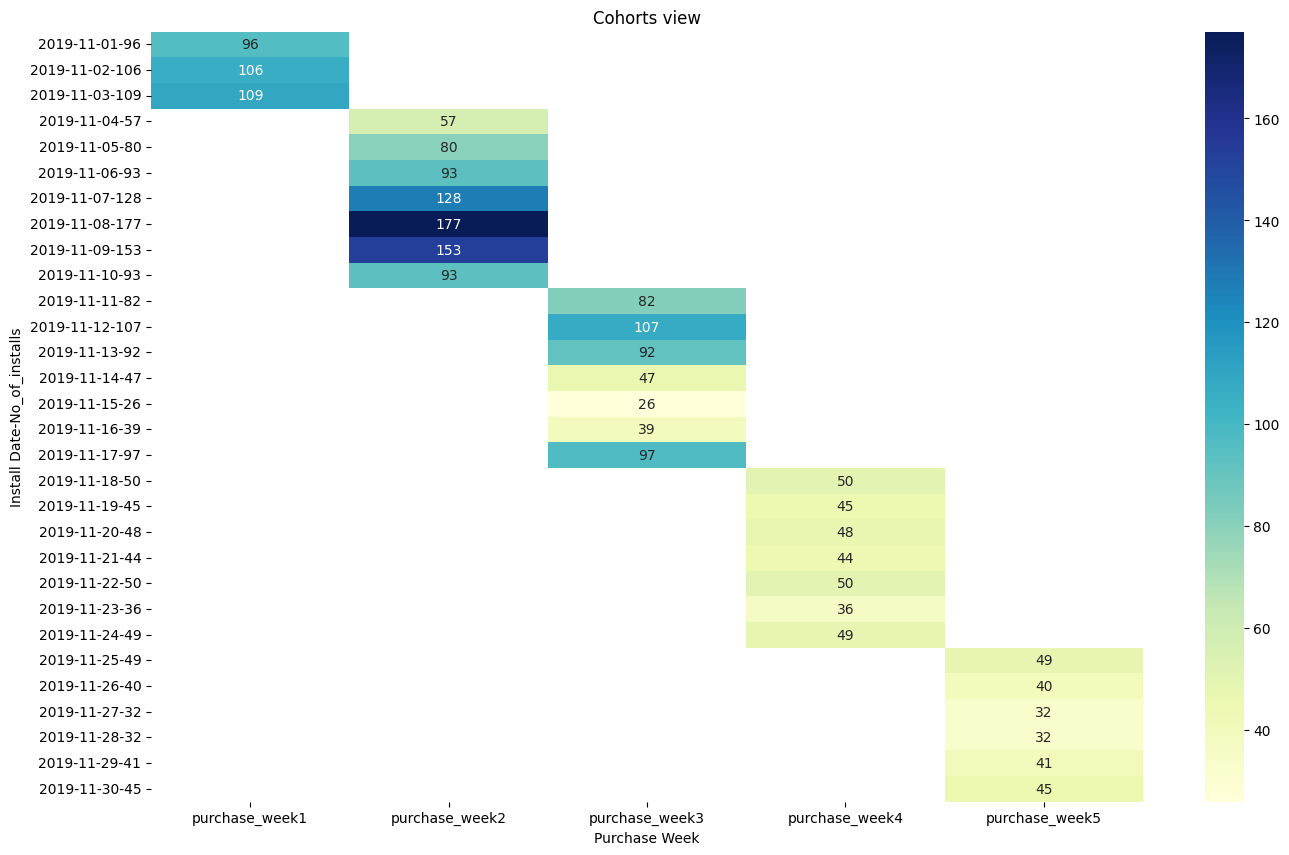

In [387]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize = (16,10))

sns.heatmap( pivot_table_nov, annot = True, cmap="YlGnBu", fmt='g')
plt.title("Cohorts view")
#ax.set_xlabel('Purchase Week')
# ax.set_ylabel("Install Date")
# ax.xaxis.set_label_position('top')

plt.show()

In [388]:
# Create a new column for no_of_install (count of installs for each date)
dec_data['no_of_install'] = dec_data.groupby('Install Date')['Install Date'].transform('count')

In [389]:
dec_data.head(4)

,Install Time,Event Time,Event Name,Media Source,Install_week,Install_month,Install Date,Purchase Week,no_of_install
1507,2019-12-22 14:11:40,2019-12-31 23:49:13,af_purchase,Facebook Ads,51,12,2019-12-22,purchase_week4,252
1508,2019-12-22 07:05:20,2019-12-31 23:37:25,af_purchase,Facebook Ads,51,12,2019-12-22,purchase_week4,252
1509,2019-12-22 14:11:40,2019-12-31 23:37:10,af_purchase,Facebook Ads,51,12,2019-12-22,purchase_week4,252
1510,2019-12-23 16:50:31,2019-12-31 23:03:14,af_purchase,Facebook Ads,52,12,2019-12-23,purchase_week5,124


In [390]:
dec_data['No_of_installs'] = dec_data['no_of_install']

In [391]:
# Pivot the table to get the desired output

# pivot_table_dec =pd.pivot_table(dec_data, values='no_of_install', index='Install Date', columns='Purchase Week', aggfunc='count', fill_value=0)
pivot_table_dec =pd.pivot_table(dec_data, values='no_of_install', index=['Install Date','No_of_installs'], columns='Purchase Week', aggfunc='count')

In [392]:
pivot_table_dec.head(4)

,Purchase Week,purchase_week1,purchase_week2,purchase_week3,purchase_week4,purchase_week5,purchase_week6
Install Date,No_of_installs,,,,,,
2019-12-01,48,48.0,NaN,NaN,NaN,NaN,NaN
2019-12-02,38,NaN,38.0,NaN,NaN,NaN,NaN
2019-12-03,56,NaN,56.0,NaN,NaN,NaN,NaN
2019-12-04,42,NaN,42.0,NaN,NaN,NaN,NaN


In [393]:
pivot_table_dec.describe()

Purchase Week,purchase_week1,purchase_week2,purchase_week3,purchase_week4,purchase_week5,purchase_week6
count,1.0,7.000000,7.000000,7.000000,7.000000,1.0
mean,48.0,50.142857,44.571429,153.000000,66.571429,24.0
std,NaN,17.752263,12.882251,144.464529,44.177133,NaN
min,48.0,31.000000,24.000000,30.000000,10.000000,24.0
25%,48.0,40.000000,36.500000,38.500000,27.500000,24.0
50%,48.0,44.000000,48.000000,51.000000,85.000000,24.0
75%,48.0,55.500000,52.500000,282.500000,96.000000,24.0
max,48.0,85.000000,62.000000,348.000000,124.000000,24.0


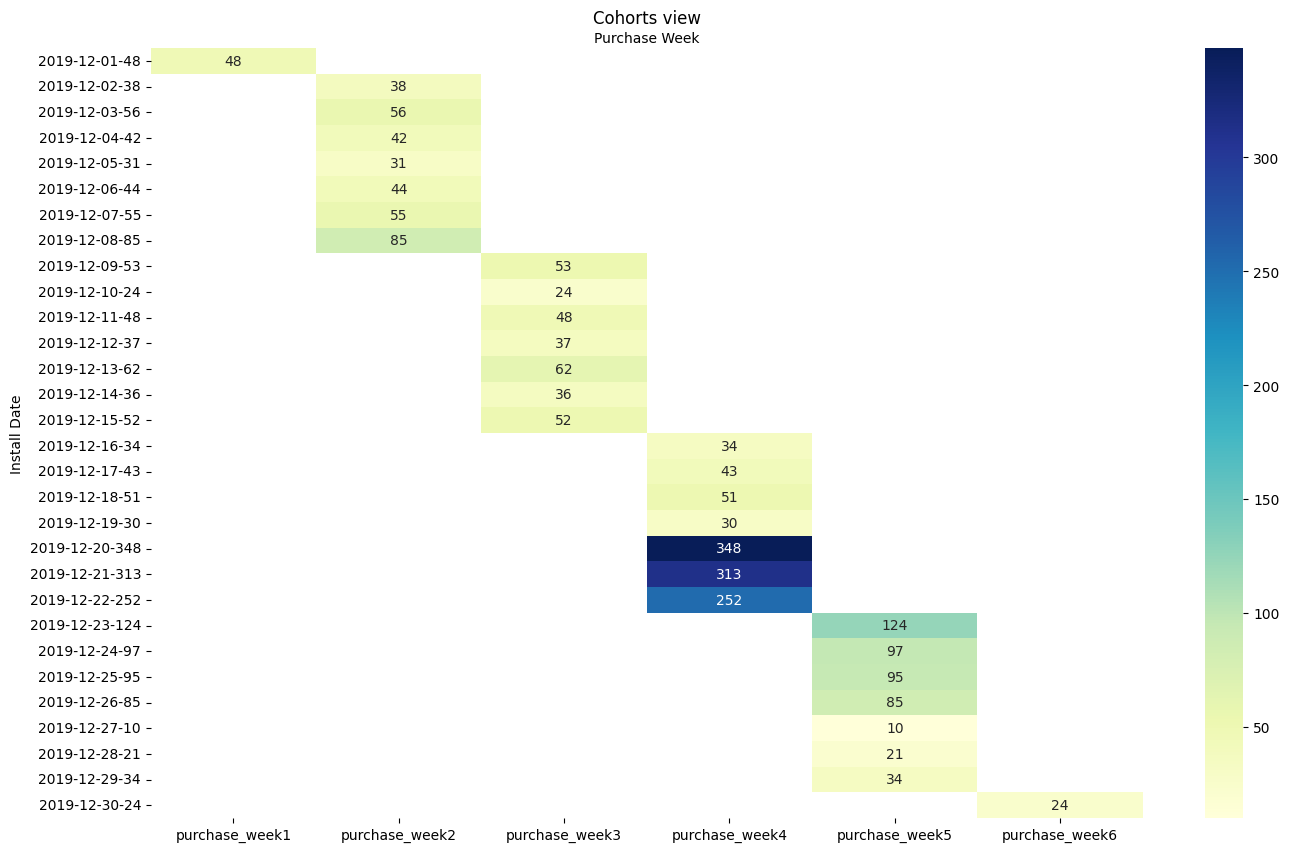

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize = (16,10))

sns.heatmap( pivot_table_dec, annot = True, cmap="YlGnBu", fmt='g')
plt.title("Cohorts view")
ax.set_xlabel('Purchase Week')
ax.set_ylabel("Install Date")
ax.xaxis.set_label_position('top')

plt.show()

In [349]:
pivot_table_nov.to_csv('nov_data.csv')

In [358]:
pivot_table_dec.to_csv('dec_data.csv')

Insights

* in nov month week2 most purchase has made
* in dec month week4 most purchase has made
* in nov month min purchase happened in week 3 & 5
* in dec month min purchase happened in week 3 & 5



Recommendation
*  the Marketing team should concentrate on week 1 & 2
for better sales most of them gets salary on first week.